<a href="https://colab.research.google.com/github/vsanjay2658-lang/SLEEP-QUALITY-PREDICITION/blob/main/sleep_quality1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Sleep Quality Prediction using Decision Tree
# Google Colab Ready Code with User Input

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------
# 1) Generate synthetic dataset
# ----------------------------
np.random.seed(42)
n = 50

age = np.random.randint(18, 70, size=n)
gender = np.random.choice(['Male','Female'], size=n)
hours_sleep = np.round(np.random.normal(loc=6.8, scale=1.5, size=n), 1)
hours_sleep = np.clip(hours_sleep, 3.0, 10.0)
caffeine_mg = np.random.choice([0,50,100,150,200,300], size=n)
exercise_minutes = np.random.choice([0,10,20,30,45,60], size=n)
screen_time_hours = np.round(np.random.normal(loc=3.5, scale=1.5, size=n), 1)
screen_time_hours = np.clip(screen_time_hours, 0.5, 12.0)
stress_level = np.random.randint(0, 11, size=n)
sleep_disorder = np.random.choice(['None','Insomnia','Sleep Apnea','RestlessLegs'], size=n)

# Rule-based label generation
score = (
    (hours_sleep - 6.5) * 1.2 +
    (exercise_minutes / 30.0) * 0.8 -
    (caffeine_mg / 200.0) * 1.0 -
    (stress_level / 10.0) * 1.5 -
    (screen_time_hours / 5.0) * 0.8
)
score -= np.where(sleep_disorder == 'Insomnia', 1.2, 0)
score -= np.where(sleep_disorder == 'Sleep Apnea', 0.8, 0)
score -= np.where(sleep_disorder == 'RestlessLegs', 1.0, 0)

sleep_quality = np.where(score >= 0.0, 'Good', 'Poor')

df = pd.DataFrame({
    'age': age,
    'gender': gender,
    'hours_sleep': hours_sleep,
    'caffeine_mg': caffeine_mg,
    'exercise_min': exercise_minutes,
    'screen_time_hrs': screen_time_hours,
    'stress_level': stress_level,
    'sleep_disorder': sleep_disorder,
    'sleep_quality': sleep_quality
})

# ----------------------------
# 2) Preprocess for Decision Tree
# ----------------------------
X = df.drop(columns=['sleep_quality'])
y = df['sleep_quality']

X_enc = pd.get_dummies(X, columns=['gender','sleep_disorder'], drop_first=True)

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.3, random_state=42, stratify=y_enc
)

# ----------------------------
# 3) Train Decision Tree
# ----------------------------
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# ----------------------------
# 4) Predictions & Results
# ----------------------------
preds = clf.predict(X_enc)
pred_labels = le.inverse_transform(preds)

df['predicted_sleep_quality'] = pred_labels

# Accuracy report
y_test_pred = clf.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

print("\nSleep Quality Prediction Results (first 10 rows):\n")
print(df.head(10).to_string(index=False))

# ----------------------------
# 5) User Input for Prediction
# ----------------------------
print("\n---- User Sleep Quality Prediction ----")

# Get user inputs
user_data = {}
user_data['age'] = int(input("Enter Age: "))
user_data['gender'] = input("Enter Gender (Male/Female): ")
user_data['hours_sleep'] = float(input("Enter Hours of Sleep: "))
user_data['caffeine_mg'] = int(input("Enter Daily Caffeine Intake (mg): "))
user_data['exercise_min'] = int(input("Enter Daily Exercise Minutes: "))
user_data['screen_time_hrs'] = float(input("Enter Screen Time Hours: "))
user_data['stress_level'] = int(input("Enter Stress Level (0-10): "))
user_data['sleep_disorder'] = input("Enter Sleep Disorder (None/Insomnia/Sleep Apnea/RestlessLegs): ")

# Convert user input to DataFrame
user_df = pd.DataFrame([user_data])

# Encode same as training
user_enc = pd.get_dummies(user_df, columns=['gender','sleep_disorder'], drop_first=True)

# Align with training columns
user_enc = user_enc.reindex(columns=X_enc.columns, fill_value=0)

# Predict
user_pred = clf.predict(user_enc)
print("\nPredicted Sleep Quality:", le.inverse_transform(user_pred)[0])


Accuracy on Test Set: 1.0

Classification Report:

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00         3
        Poor       1.00      1.00      1.00        12

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Sleep Quality Prediction Results (first 10 rows):

 age gender  hours_sleep  caffeine_mg  exercise_min  screen_time_hrs  stress_level sleep_disorder sleep_quality predicted_sleep_quality
  56 Female          5.3            0            10              3.9             5       Insomnia          Poor                    Poor
  69 Female          4.4            0            60              4.7             9    Sleep Apnea          Poor                    Poor
  46 Female          8.0            0            30              1.6             2       Insomnia          Good                    Good
  32 Female          6.0  

Accuracy on Test Set: 1.0

Classification Report:

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00         3
        Poor       1.00      1.00      1.00        12

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Sleep Quality Prediction Results (first 10 rows):

 age gender  hours_sleep  caffeine_mg  exercise_min  screen_time_hrs  stress_level sleep_disorder sleep_quality predicted_sleep_quality
  56 Female          5.3            0            10              3.9             5       Insomnia          Poor                    Poor
  69 Female          4.4            0            60              4.7             9    Sleep Apnea          Poor                    Poor
  46 Female          8.0            0            30              1.6             2       Insomnia          Good                    Good
  32 Female          6.0  

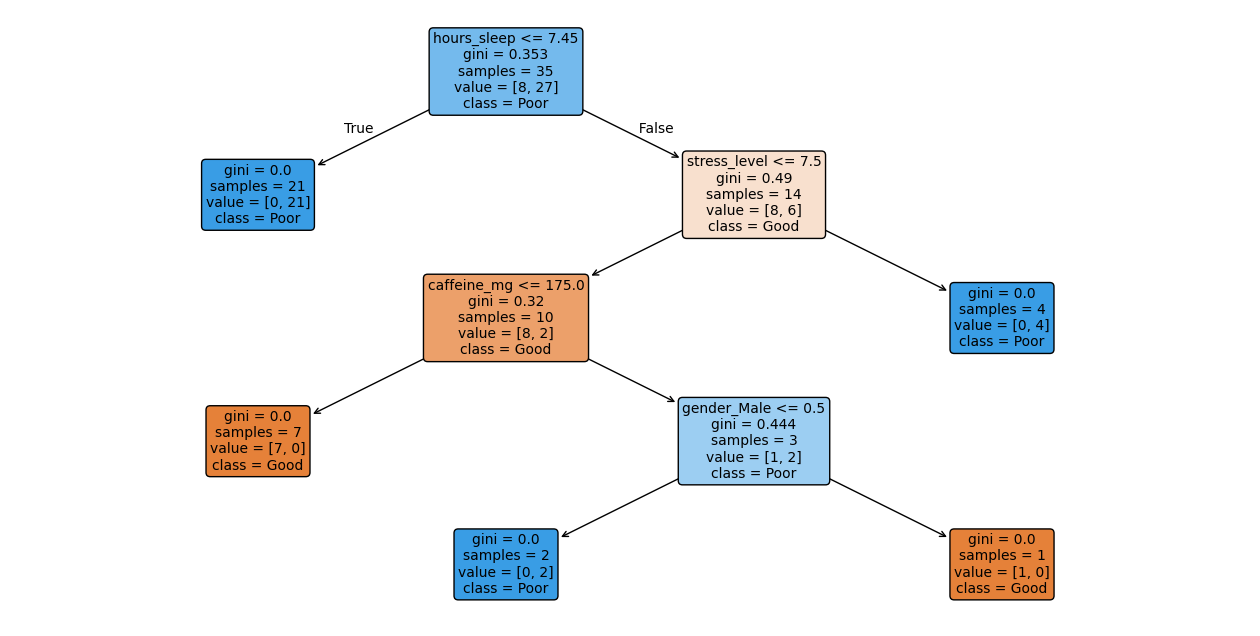

In [ ]:
# Sleep Quality Prediction using Decision Tree with Visualization
# Google Colab Ready Code

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# ----------------------------
# 1) Generate synthetic dataset
# ----------------------------
np.random.seed(42)
n = 50

age = np.random.randint(18, 70, size=n)
gender = np.random.choice(['Male','Female'], size=n)
hours_sleep = np.round(np.random.normal(loc=6.8, scale=1.5, size=n), 1)
hours_sleep = np.clip(hours_sleep, 3.0, 10.0)
caffeine_mg = np.random.choice([0,50,100,150,200,300], size=n)
exercise_minutes = np.random.choice([0,10,20,30,45,60], size=n)
screen_time_hours = np.round(np.random.normal(loc=3.5, scale=1.5, size=n), 1)
screen_time_hours = np.clip(screen_time_hours, 0.5, 12.0)
stress_level = np.random.randint(0, 11, size=n)
sleep_disorder = np.random.choice(['None','Insomnia','Sleep Apnea','RestlessLegs'], size=n)

# Rule-based label generation
score = (
    (hours_sleep - 6.5) * 1.2 +
    (exercise_minutes / 30.0) * 0.8 -
    (caffeine_mg / 200.0) * 1.0 -
    (stress_level / 10.0) * 1.5 -
    (screen_time_hours / 5.0) * 0.8
)
score -= np.where(sleep_disorder == 'Insomnia', 1.2, 0)
score -= np.where(sleep_disorder == 'Sleep Apnea', 0.8, 0)
score -= np.where(sleep_disorder == 'RestlessLegs', 1.0, 0)

sleep_quality = np.where(score >= 0.0, 'Good', 'Poor')

df = pd.DataFrame({
    'age': age,
    'gender': gender,
    'hours_sleep': hours_sleep,
    'caffeine_mg': caffeine_mg,
    'exercise_min': exercise_minutes,
    'screen_time_hrs': screen_time_hours,
    'stress_level': stress_level,
    'sleep_disorder': sleep_disorder,
    'sleep_quality': sleep_quality
})

# ----------------------------
# 2) Preprocess for Decision Tree
# ----------------------------
X = df.drop(columns=['sleep_quality'])
y = df['sleep_quality']

X_enc = pd.get_dummies(X, columns=['gender','sleep_disorder'], drop_first=True)

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.3, random_state=42, stratify=y_enc
)

# ----------------------------
# 3) Train Decision Tree
# ----------------------------
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# ----------------------------
# 4) Predictions & Results
# ----------------------------
preds = clf.predict(X_enc)
pred_labels = le.inverse_transform(preds)
df['predicted_sleep_quality'] = pred_labels

# Accuracy report
y_test_pred = clf.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

# Show results
print("\nSleep Quality Prediction Results (first 10 rows):\n")
print(df.head(10).to_string(index=False))

# ----------------------------
# 5) Visualize Decision Tree
# ----------------------------
plt.figure(figsize=(16,8))
plot_tree(
    clf,
    feature_names=X_enc.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

